In [1]:
#import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def Pw2(x):
    return np.power(x,2)

In [2]:
# Pt1 formule e costanti 

def t0_fit(b,phi,sb = 0,sphi = 0):
    #t0  = -phi/b*180/pi
    t0  = (2*pi-phi)/b*180/pi
    db   = -phi/Pw2(b) *sb
    dphi = -1/b        *sphi
    st0 = np.sqrt(Pw2(db) + Pw2(dphi))*180/pi
    return t0,st0

In [3]:
# Pt1

sigmaRad = (1/2)*pi/180
name  =  ['Data/L2.csv','Data/L4_cut.csv']
title = ['$Fit\    \dfrac{\lambda}{2}$','$Fit\    \dfrac{\lambda}{4}$']

bounds_min =[[0,0,4000,-1000],  
             [0,0,3000,-1000]]
bounds_max =[[3,10,15000,1000],
             [3,10,15000,3000]] 

array_t0  = np.asarray([])

def func_fit(x,b,phi,A,c):
    I = A*Pw2(np.cos(b*x + phi)) + c
    return I

Chi2 =  23.145300249146338 | Reduced Chi2 =  1.0520591022339245
theta_0 = 30.53273505046836 +- 0.467436847759594 °


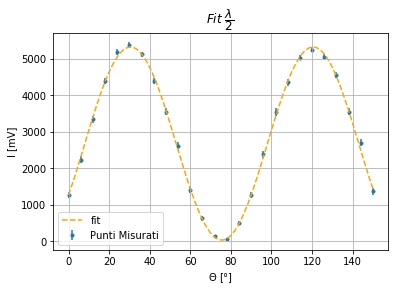

Chi2 =  19.36508898261992 | Reduced Chi2 =  1.4896222294323016
theta_0 = 35.606661417624515 +- 1.166100728243591 °


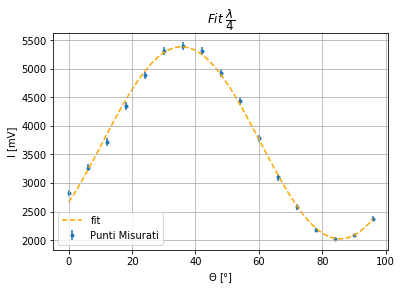

In [4]:
for T in range(len(name)):

    df= pd.read_csv(name[T])
    theta = np.asarray(df.iloc[:,0])*pi/180
    I  = np.asarray(df.iloc[:,1])
    
    X = theta
    sX = np.full( len(X), sigmaRad )
    Y = I
    sY = 0.006*Y + 0.005*Y + 4
    
    #Fit 
    [b,phi,A,c],pcov = s.optimize.curve_fit(func_fit,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = (bounds_min[T],bounds_max[T]))
    dX = 2*A*b*np.sin(b*X + phi)*np.cos(b*X + phi)*sX
    sY = np.sqrt(Pw2(sY) + Pw2(dX))
    [b,phi,A,c],pcov = s.optimize.curve_fit(func_fit,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = (bounds_min[T],bounds_max[T]))
    [sb,sphi,sA,sc] = np.sqrt(np.diag(pcov))

    Yexp  = func_fit(X,b,phi,A,c)
    chi2  = np.sum( ( (Yexp - Y)/sY )**2 )
    chi2r = chi2/(len(X)-4) #3 parametri
    
    #Misure dervate
   
    theta0,stheta0 = t0_fit(b,phi,sb = sb,sphi = sphi)
    AAA = '{} +- {}'.format(theta0,stheta0)
    array_t0 = np.append(array_t0,AAA)
    
    #plot 
    x = np.linspace(np.min(X),np.max(X),100)
    y = func_fit(x,b,phi,A,c)
    
    plt.errorbar(X*180/pi,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    plt.plot(x*180/pi,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

    plt.title(title[T])
    plt.xlabel('$\Theta$ [°]')
    plt.ylabel('I [mV]')
    plt.grid()
    plt.legend(loc = 'lower left')
    
    #print(b,phi,A,c)
    print('Chi2 = ',chi2,'| Reduced Chi2 = ',chi2r)
    print('theta_0 =',AAA,'°')
    plt.show()


In [5]:
Results = pd.DataFrame({'':title,'$\theta_0 \pm \sigma$':array_t0})
#print(Results.to_latex(index=False))
Results

,,$\theta_0 \pm \sigma$
0,$Fit\ \dfrac{\lambda}{2}$,30.53273505046836 +- 0.467436847759594
1,$Fit\ \dfrac{\lambda}{4}$,35.606661417624515 +- 1.166100728243591


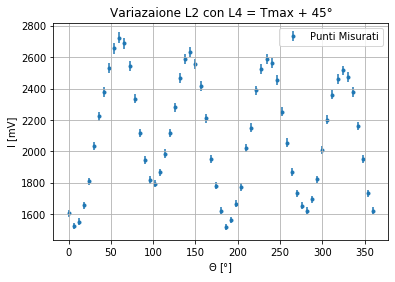

In [6]:
# Variazaione L2 con L4 = Tmax + 45°
name = 'Data/VarL2.csv'
df= pd.read_csv(name)
theta = np.asarray(df.iloc[:,0])*pi/180
I  = np.asarray(df.iloc[:,1])
    
X = theta
Y = I
sY = 0.006*Y + 0.005*Y + 4

plt.errorbar(X*180/pi,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
#plt.plot(x*180/pi,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

plt.title('Variazaione L2 con L4 = Tmax + 45°')
plt.xlabel('$\Theta$ [°]')
plt.ylabel('I [mV]')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

In [7]:
# Pt 3
def sM(I):
    #sI = 0.006*I + 0.005*I + 4
    sI = np.sqrt(Pw2(0.006*I)  + Pw2(0.005*I + 4))
    return sI

def Stokes(In,I0,sIn = 0,sI0 = 0):
    Sn = (2*In - I0)/I0
    dIn =  2/I0         *sIn
    dI0 = -2*In/Pw2(I0) *sI0
    sSn = np.sqrt(Pw2(dI0) + Pw2(dIn))
    return Sn,sSn

def calcV(S1,S2,S3,sS1,sS2,sS3):
    V   = np.sqrt(Pw2(S1) + Pw2(S2) + Pw2(S3))
    dS1 = S1/V *sS1
    dS2 = S2/V *sS2
    dS3 = S3/V *sS3
    sV  = np.sqrt(Pw2(dS1) + Pw2(dS2) + Pw2(dS3))
    return V,sV

def Parameters(I1,I1p,I2,I3):
    
    I0  = I1 + I1p        #I2p = I0 - I2  #I3p = I0 - I3
    sI0 = np.sqrt(Pw2(sM(I1)) + Pw2(sM(I1p)))
    sI1 = sM(I1)
    sI2 = sM(I2)
    sI3 = sM(I3)
    
    S1,sS1 = Stokes(I1,I0,sIn = sI1, sI0 = sI0)
    S2,sS2 = Stokes(I2,I0,sIn = sI2, sI0 = sI0)
    S3,sS3 = Stokes(I3,I0,sIn = sI3, sI0 = sI0)
    
    V,sV = calcV(S1,S2,S3,sS1,sS2,sS3)
    
    return I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV

In [8]:
# Coeff stokes [mV] massimo alto

I1,I1p,I2,I3 = 85,5351,2672,2311
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Coeff stokes [mV] massimo alto')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Coeff stokes [mV] massimo alto
I0 = 5436 +- 44.682278209598934
S1 = -0.9687270051508462 +- 0.0016588502235470046
S2 = -0.01692420897718911 +- 0.011869373983230307
S3 = -0.14974245768947755 +- 0.010374111037576317
V = 0.9803781122571619 +- 0.002288996866055684


In [9]:
# Coeff stokes [mV] massimo basso

I1,I1p,I2,I3 = 60,4260,2611,1860
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Coeff stokes [mV] massimo basso')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Coeff stokes [mV] massimo basso
I0 = 4320 +- 36.221860802559554
S1 = -0.9722222222222222 +- 0.0020112365939821963
S2 = 0.20879629629629629 +- 0.014753743329501669
S3 = -0.1388888888888889 +- 0.01080456720298935
V = 1.00404286073183 +- 0.003929366626377266


In [10]:
# Coeff stokes [mV] massimo alto  laser a vuoto

I1,I1p,I2,I3 = 7046,5468,729,3324
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Laser a vuoto')
print('Coeff stokes [mV] massimo alto')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Laser a vuoto
Coeff stokes [mV] massimo alto
I0 = 12514 +- 73.38128875946511
S1 = 0.1260987693782963 +- 0.011338701891121038
S2 = -0.8834904906504715 +- 0.0015647112015684166
S3 = -0.468754994406265 +- 0.005542989406489056
V = 1.0080613034381138 +- 0.003245920375464076


In [11]:
# Coeff stokes [mV] massimo alto  laser 45
I1,I1p,I2,I3 = 1305,124,456,938
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Laser 45')
print('Coeff stokes [mV] massimo alto')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Laser 45
Coeff stokes [mV] massimo alto
I0 = 1429 +- 13.92775864954588
S1 = 0.8264520643806857 +- 0.025572989430322518
S2 = -0.3617914625612316 +- 0.011428396765665058
S3 = 0.31280615815255425 +- 0.01933096997069123
V = 0.9548632204035575 +- 0.023425684592099722


In [12]:
# Coeff stokes [mV] massimo alto  laser 90   QUESTO NON VIENE CAZZO 
I1,I1p,I2,I3 = 2930,337,1315,562
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Laser 90')
print('Coeff stokes [mV] massimo alto QUESTO NON VIENE CAZZO')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Laser 90
Coeff stokes [mV] massimo alto QUESTO NON VIENE CAZZO
I0 = 3267 +- 26.330336287256184
S1 = 0.7936945209672482 +- 0.02133447944618639
S2 = -0.19498010407101315 +- 0.010360272768434443
S3 = -0.6559534741352924 +- 0.0054157293463578575
V = 1.0479709890197975 +- 0.016621850108690828


In [13]:
# Coeff stokes [mV] massimo alto  laser 101    
I1,I1p,I2,I3 = 3188,1140,1881,275
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Laser 101')
print('Coeff stokes [mV] massimo alto  laser 101   ')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Laser 101
Coeff stokes [mV] massimo alto  laser 101   
I0 = 4328 +- 30.072571955188668
S1 = 0.4731977818853974 +- 0.016365183017526118
S2 = -0.13077634011090572 +- 0.010101984795329736
S3 = -0.8729205175600739 +- 0.002744165785408836
V = 1.0015032810187947 +- 0.008200617926852017


In [14]:
# Coeff stokes [mV] massimo alto  laser CRISTALLO   
I1,I1p,I2,I3 = 2970,3980,579,2108
I0,S1,S2,S3,V,sI0,sS1,sS2,sS3,sV = Parameters(I1,I1p,I2,I3)

print('Laser cristallo')
print('Coeff stokes [mV] massimo max alto crisallo')
print('I0 =',I0,'+-',sI0)
print('S1 =',S1,'+-',sS1)
print('S2 =',S2,'+-',sS2)
print('S3 =',S3,'+-',sS3)
print('V =',V,'+-',sV)

Laser cristallo
Coeff stokes [mV] massimo max alto crisallo
I0 = 6950 +- 42.59506192036819
S1 = -0.14532374100719425 +- 0.00911919558106123
S2 = -0.8333812949640288 +- 0.002445230994402207
S3 = -0.3933812949640288 +- 0.0066766092956055765
V = 0.9329481313148249 +- 0.0038359166828963514
